# Goal of the project:-

1. Understand Customer Behavior
Included
The project analyzes customer spending patterns using metrics like Total Spend, Purchase Frequency, and ATV.
Insights into customer purchase habits are evident from scatter plots and statistical summaries.

2. Identify Revenue Drivers
Included
Top-spending customers and countries are identified.
The bar plot of top 10 countries and pie chart of top 5 countries highlight key revenue contributors.
Customer aggregation by total spend and purchase frequency supports this goal.

3. Geographic Analysis
Partially Included
Total spending by country is visualized using scatter plots, line plots, and bar charts.
However, deeper analysis (e.g., country-specific trends or comparisons over time) is not explicitly conducted.

4. Spending Patterns
Included
The project examines the distribution of Total Spend through histograms, PDFs, and CDFs.
Skewness analysis reveals trends in transaction values.

5. Improve Business Strategy
Partially Included
The project identifies key insights like top customers and regions but doesn’t explicitly provide actionable recommendations.
Conclusions can infer strategies, but they are not directly outlined in the notebook.

6. Data Visualization
Included
The project extensively uses visualizations like bar plots, pie charts, scatter plots, and heatmaps to present data insights.
These effectively communicate findings and make the data interpretable.

In [82]:
import numpy as np                                     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# numpy and pandas for numerical operations and data manipulation.
# matplotlib.pyplot and seaborn for creating visualizations.
# warnings to suppress warnings during execution.
# os for file and directory operations.

In [83]:
warnings.simplefilter(action='ignore',category=FutureWarning)
# Python to suppress FutureWarning messages, which are often displayed when using deprecated features.

# Data Preprocessing

In [85]:
df = pd.read_csv('E-Commerce Dataset.csv',encoding='latin1')
df
# Loads an e-commerce dataset from a CSV file using pandas.
# encoding='latin1': Ensures compatibility with non-UTF-8 characters in the dataset.
# Output: Displays the entire DataFrame.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [86]:
df.shape         # Displays the number of rows and columns in the dataset.

(541909, 8)

In [87]:
df.columns       # Lists the column names of the dataset to understand its structure.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [88]:
df.info()       #  Provides a summary of the dataset, including column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [89]:
df.ndim        # Returns the number of dimensions in the dataset. For a typical pandas DataFrame, this will return 2 (rows and columns).

2

In [90]:
df.head()    # Displays the first five rows of the dataset. This is useful for understanding the data's structure and content.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [91]:
df.tail()     # Displays the last five rows of the dataset to check for any trailing data inconsistencies.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [92]:
df.sample()       # Displays one random row from the dataset. This helps in quickly verifying the data format and values.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
393927,570861,15036,ASSORTED COLOURS SILK FAN,36,10/12/2011 15:27,0.83,14775.0,United Kingdom


In [93]:
df.describe()    
# Provides a statistical summary of numerical columns, 
# including: Count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [94]:
df.describe().T       # Displays the statistical summary from Cell 12 in a transposed format for easier readability.

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [95]:
df.isnull().sum()        # Counts the number of missing (NaN) values in each column of the dataset.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [96]:
df.duplicated()       # Identifies duplicate rows in the dataset. Returns a Boolean series where True indicates duplicates.

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [97]:
df.duplicated().sum()        # Counts the total number of duplicate rows in the dataset.

5268

In [98]:
df.fillna(0, inplace=True)    # Replaces all missing (NaN) values in the dataset with 0. This ensures no null values remain.

In [99]:
df.isnull().sum()       # Confirms that all missing values have been replaced by displaying a sum of null values per column.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [100]:
# Calculate total spend per transaction
df['Total Spend'] = df['Quantity'] * df['UnitPrice']
print(df[['InvoiceNo', 'CustomerID', 'Total Spend']])

# calculates the total spending per transaction as the product of Quantity and UnitPrice. A new column, Total Spend, is added to the dataset.

       InvoiceNo  CustomerID  Total Spend
0         536365     17850.0        15.30
1         536365     17850.0        20.34
2         536365     17850.0        22.00
3         536365     17850.0        20.34
4         536365     17850.0        20.34
...          ...         ...          ...
541904    581587     12680.0        10.20
541905    581587     12680.0        12.60
541906    581587     12680.0        16.60
541907    581587     12680.0        16.60
541908    581587     12680.0        14.85

[541909 rows x 3 columns]


In [101]:
# Aggregate data at the customer level
customer_data = df.groupby('CustomerID').agg({  
                                      # An aggregate function is a function that performs a calculation on a set of values, and returns a single value.
                                      # used with the GROUP BY clause of the SELECT statement.
    'Total Spend': 'sum',             # Total Spend: Sum of all transactions
    'InvoiceNo': 'nunique',           # Purchase Frequency: Count of unique invoices
}).reset_index()                      # The reset_index method in Pandas resets the index of a DataFrame to the default one.

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceNo': 'Purchase Frequency'
}, inplace=True)

# Calculate Average Transaction Value (ATV)
customer_data['ATV'] = customer_data['Total Spend'] / customer_data['Purchase Frequency']

print(customer_data)

      CustomerID  Total Spend  Purchase Frequency          ATV
0            0.0   1447682.12                3710   390.210814
1        12346.0         0.00                   2     0.000000
2        12347.0      4310.00                   7   615.714286
3        12348.0      1797.24                   4   449.310000
4        12349.0      1757.55                   1  1757.550000
...          ...          ...                 ...          ...
4368     18280.0       180.60                   1   180.600000
4369     18281.0        80.82                   1    80.820000
4370     18282.0       176.60                   3    58.866667
4371     18283.0      2094.88                  16   130.930000
4372     18287.0      1837.28                   3   612.426667

[4373 rows x 4 columns]


# Exploratory Data Analysis

In [103]:
# Analyse the unitprice variables 
print(df.UnitPrice.value_counts())

# Displays the frequency of each unique UnitPrice value in the dataset. This helps identify patterns or anomalies in pricing.

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1630, dtype: int64


In [104]:
print("Mean Spend:", np.mean(df['Total Spend']))                   # Mean: Average spend per customer.
print("Median Spend:", np.median(df['Total Spend']))               # Median: Middle value, less sensitive to outliers.
print("Standard Deviation:", np.std(df['Total Spend']))            # Standard Deviation (SD): Measure of variability in spending. 
print("Skewness:", df['Total Spend'].skew())                       # Skewness: Indicates whether the spending distribution is symmetric or skewed.
print("Kurtosis:", df['Total Spend'].kurt())                       # Kurtosis: Measure of "tailedness" (presence of outliers).

Mean Spend: 17.98779487699964
Median Spend: 9.75
Standard Deviation: 378.81047399082905
Skewness: -0.9643891765708785
Kurtosis: 151197.9964352516


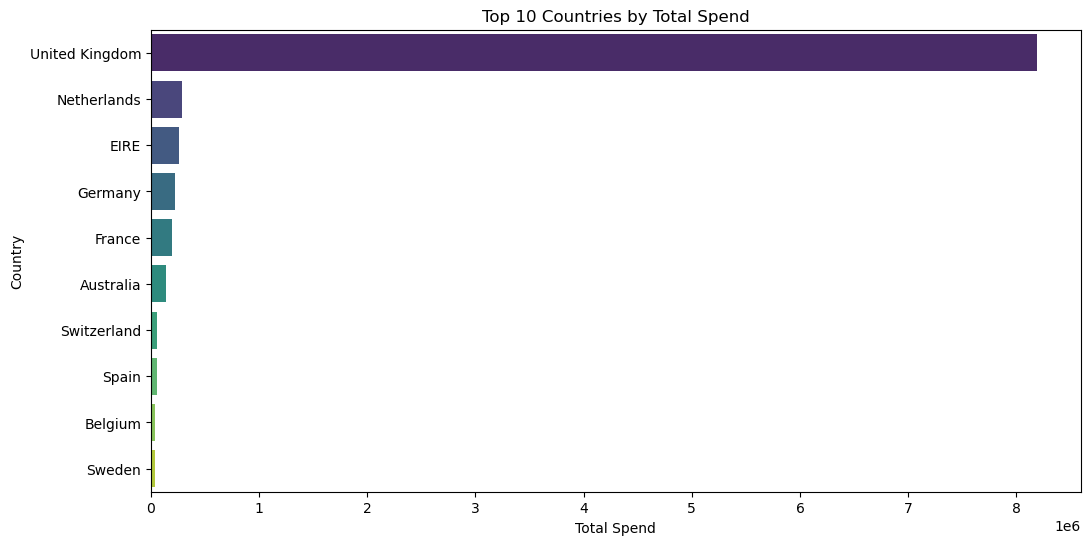

In [105]:
# Total Spend by Country

# Groups data by Country and calculates the total spending (Total Spend) for each country.
country_spend = df.groupby('Country')['Total Spend'].sum().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_spend.values, y=country_spend.index, palette='viridis')
plt.title("Top 10 Countries by Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Country")
plt.show()

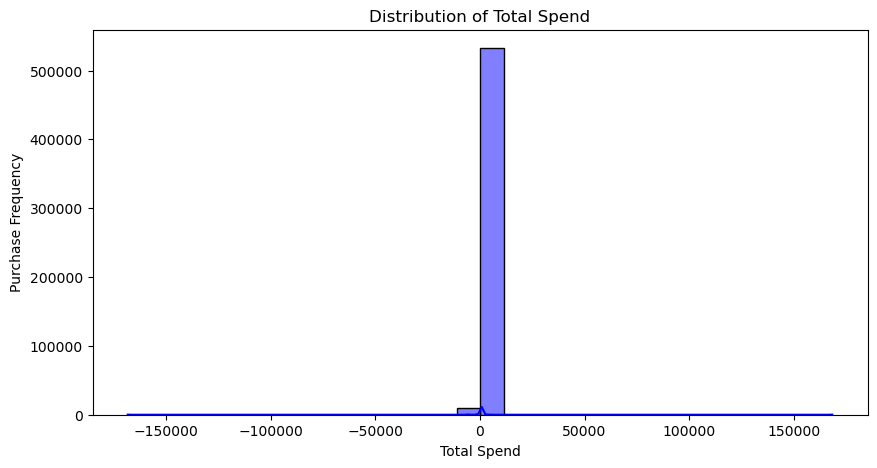

In [106]:
# Total Spend Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Spend'], kde=True, bins=30, color='blue')        # Plots the distribution of Total Spend using a histogram with a kernel density estimate (KDE) overlay.
plt.title("Distribution of Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Purchase Frequency")
plt.show()

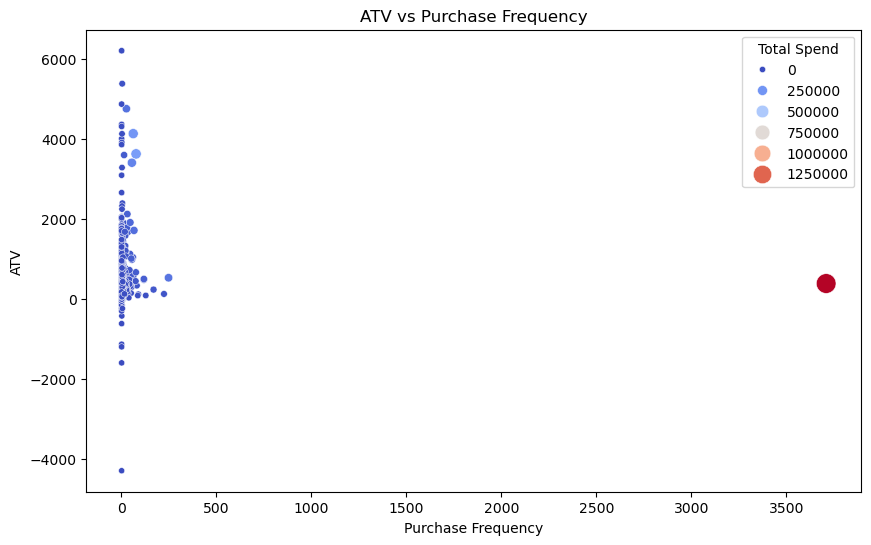

In [107]:
# ATV vs Purchase Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(customer_data, x='Purchase Frequency', y='ATV', hue='Total Spend', size='Total Spend', sizes=(20, 200), palette='coolwarm')
plt.title("ATV vs Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("ATV")
plt.show()

<Axes: xlabel='Total Spend', ylabel='Country'>

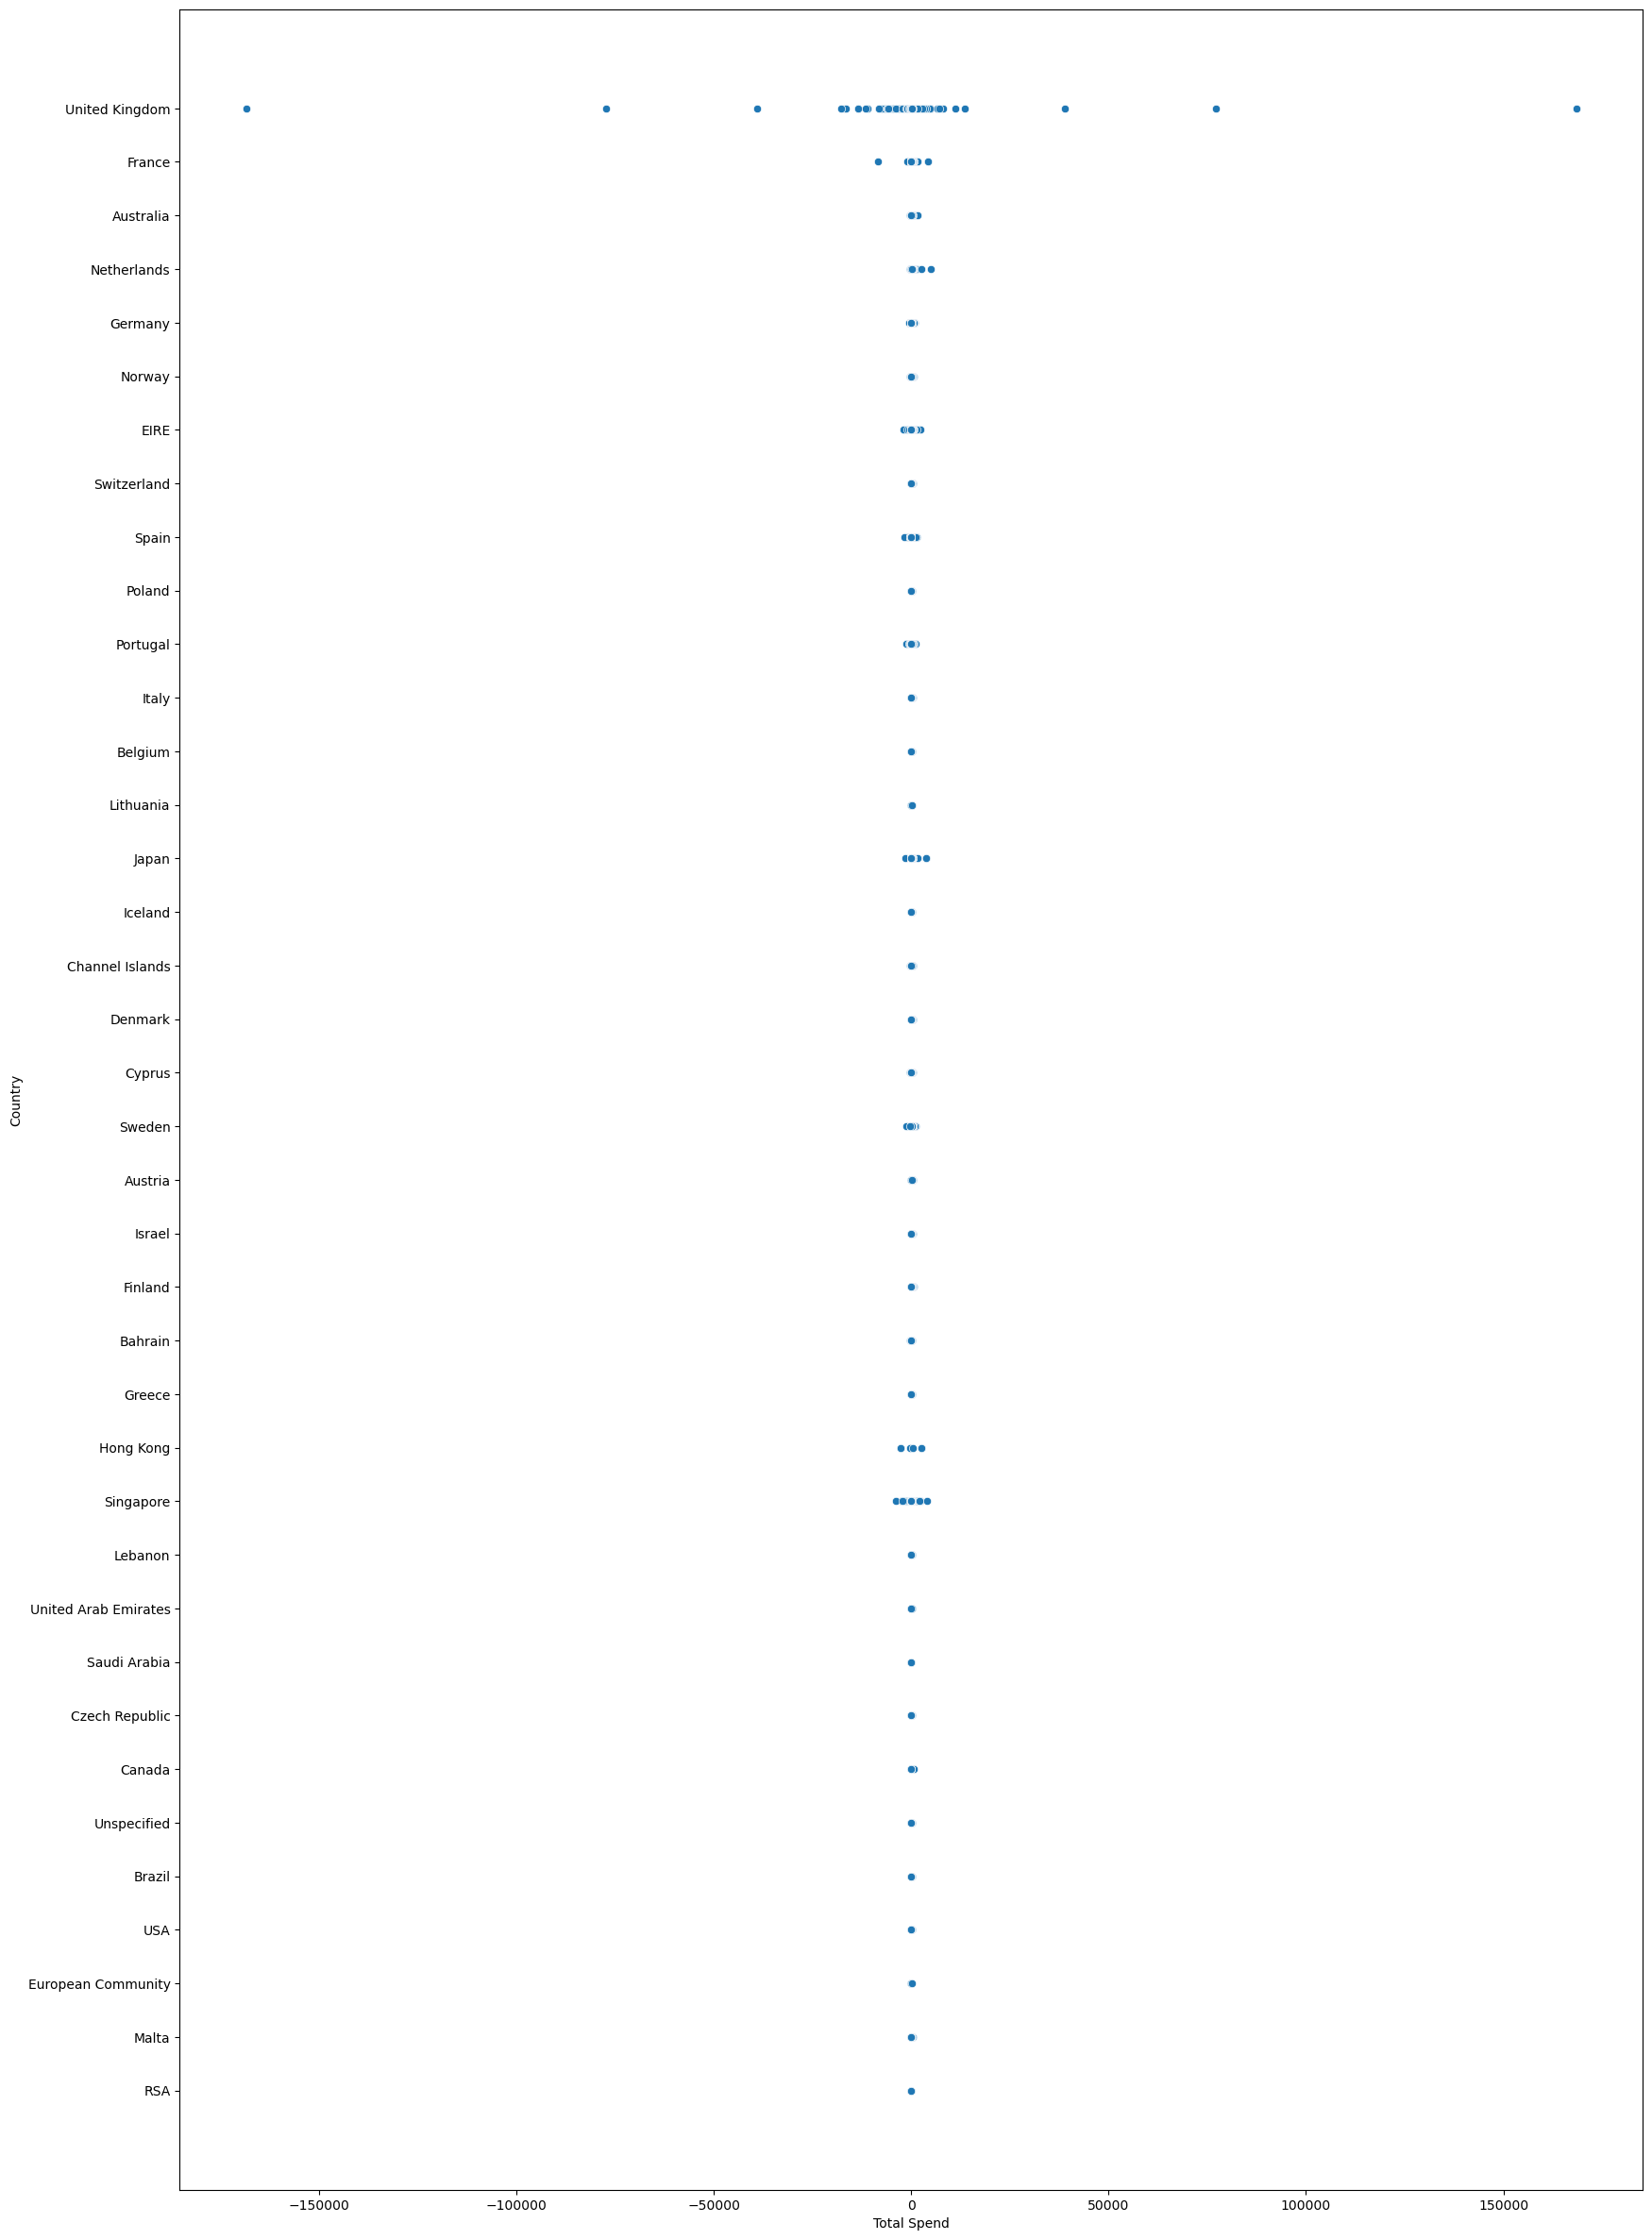

In [108]:
# Creates a scatterplot of Total Spend against Country.
plt.figure(figsize=(20,30))
sns.scatterplot(data=df, x='Total Spend',y='Country')

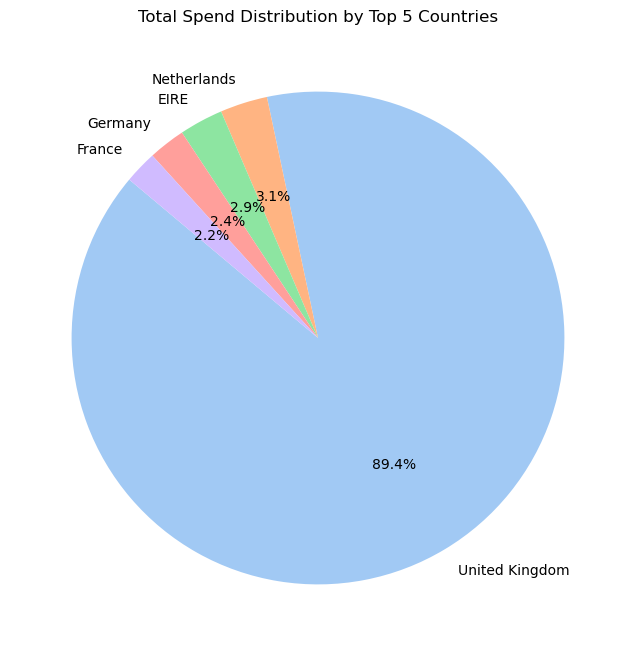

In [109]:
# Aggregate Total Spend by Country
country_spend = df.groupby('Country')['Total Spend'].sum().sort_values(ascending=False).head(5)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(country_spend, labels=country_spend.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Total Spend Distribution by Top 5 Countries")
plt.show()

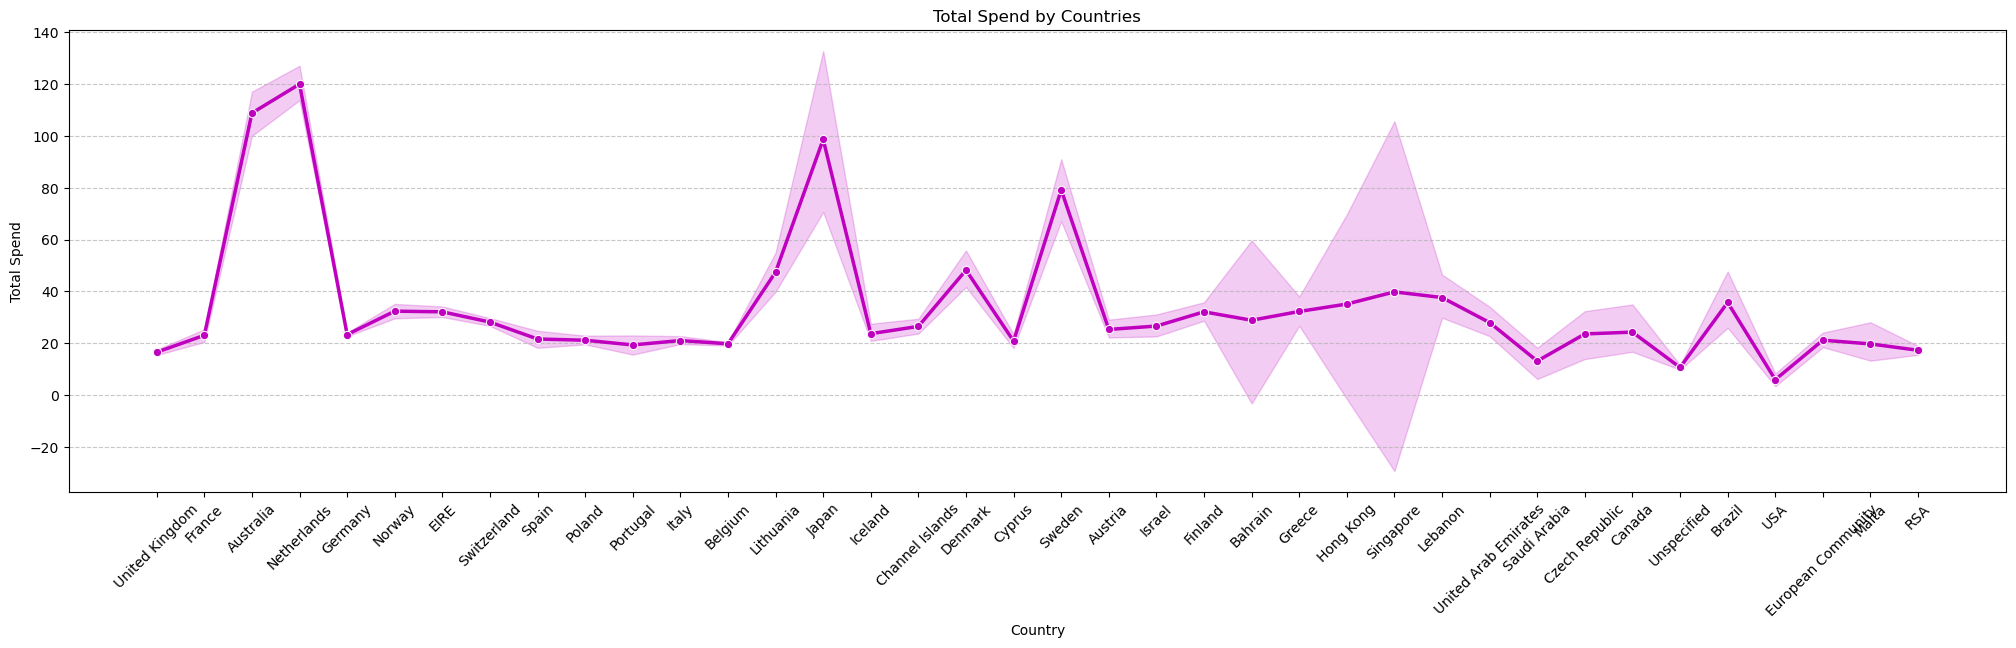

In [110]:
# Line Plot
plt.figure(figsize=(25, 6))
sns.lineplot(data=df, x='Country', y='Total Spend', marker='o', linewidth=2.5, color='m')
plt.title("Total Spend by Countries")
plt.xlabel("Country")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

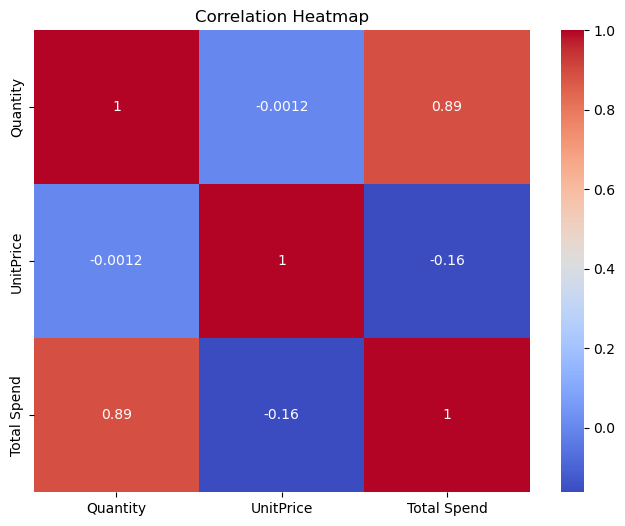

In [111]:
# Select numerical columns for correlation
numerical_columns = ['Quantity', 'UnitPrice', 'Total Spend']
correlation_matrix = df[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')                # annot=True: Displays the correlation values on the heatmap
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Density')

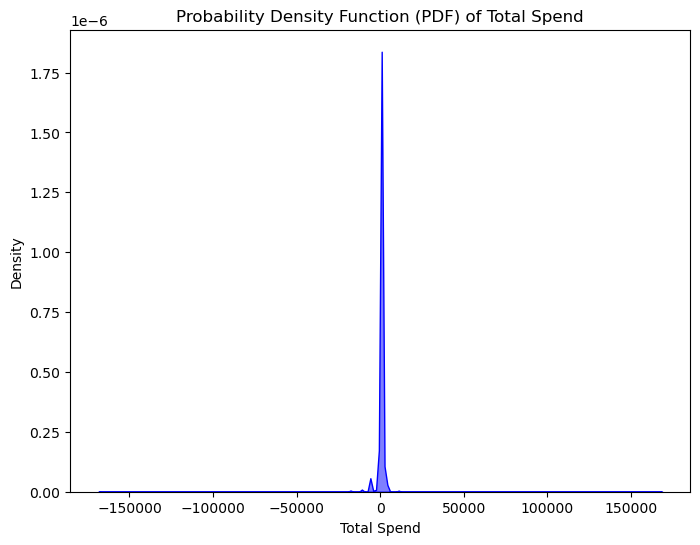

In [112]:
# Select a variable for analysis (e.g., 'Total Spend')
total_spend = df['Total Spend']

# Plot PDF using Seaborn's KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(total_spend, fill=True, color='blue', alpha=0.5)
plt.title("Probability Density Function (PDF) of Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Density")

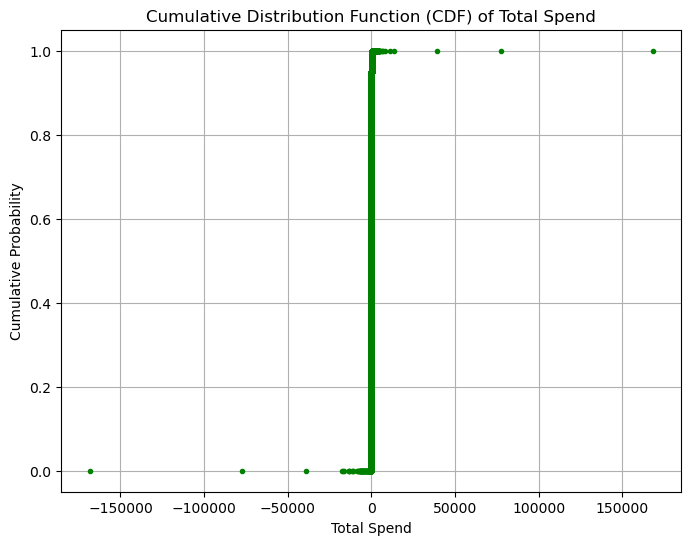

In [113]:
# Sort the data
sorted_spend = np.sort(total_spend)

# Calculate CDF
cdf = np.arange(1, len(sorted_spend) + 1) / len(sorted_spend)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_spend, cdf, marker='.', linestyle='none', color='green')
plt.title("Cumulative Distribution Function (CDF) of Total Spend")
plt.xlabel("Total Spend")
plt.ylabel("Cumulative Probability")
plt.grid()

# Conclusion

1. Customer Behavior Analysis:-
Customers with higher purchase frequencies generally have higher total spending.
Average Transaction Value (ATV) varies significantly among customers, indicating diverse purchasing habits.
Identifying top-spending customers can help target premium services or personalized offers.

2. Country-Wise Insights:-
Certain countries contribute significantly to the total revenue, as seen in the top countries analysis.
The top 5 countries account for a large proportion of the total spending, indicating geographic revenue concentration.
Countries with lower total spend could be targeted for marketing campaigns to boost sales.

3. Product Performance:-
A significant skew in UnitPrice values suggests the presence of both high-value and low-value products.
Correlation analysis between Quantity, UnitPrice, and Total Spend provides insights into how pricing impacts total sales.

4. Spending Distribution:-
Spending distribution is highly skewed, with a small number of transactions contributing significantly to revenue.
The Cumulative Distribution Function (CDF) confirms that the majority of transactions are of lower value, while high-value transactions are rare but impactful.

5. Missing and Duplicate Data Handling:-
Addressing missing values (replaced with zeros) ensures data completeness without discarding records.
Duplicates in the dataset are minimal, indicating good data quality.

6. Revenue Sources:-
Most revenue comes from a small subset of customers and countries, emphasizing the 80/20 principle (Pareto).
Strategic focus on high-spending customers and regions can maximize profitability.

7. Visual Insights:-
Bar charts, pie charts, and line plots illustrate key patterns in spending and regional performance.
Scatter plots show the relationship between spending, customer frequency, and geographic trends.

8. Business Recommendations:-
Focus marketing efforts on top-spending customers and countries to maximize ROI.
Reassess pricing strategies for products with low revenue contributions.
Target low-spend regions or customers with promotions to boost overall sales.